<a href="https://colab.research.google.com/github/Ed00107/sbd1/blob/main/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1. SQL

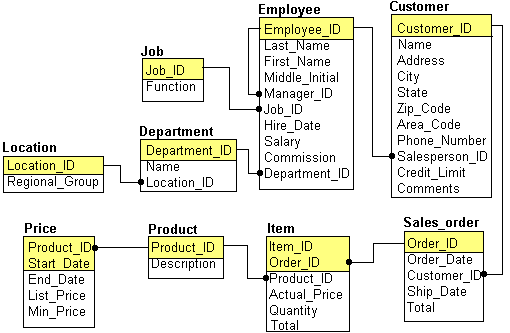



**Первые 20 заданий необходимо выполнять без использования соединений таблиц, в оставшихся 20 соединения таблиц и подзапросы допускаются**

In [2]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import psycopg2
import pandas as pd

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

**Пример запроса (не забывайте указывать da. перед названием таблицы):**

In [4]:
pd.read_sql_query("select * from da.customer limit 5", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,JOCKSPORTS,345 VIEWRIDGE,BELMONT,CA,96711,415,5986609,7844,5000.0,Very friendly people to work with -- sales rep...
1,101,TKB SPORT SHOP,490 BOLI RD.,REDWOOD CITY,CA,94061,415,3681223,7521,10000.0,Rep called 5/8 about change in order - contact...
2,102,VOLLYRITE,9722 HAMILTON,BURLINGAME,CA,95133,415,6443341,7654,7000.0,Company doing heavy promotion beginning 10/89....
3,103,JUST TENNIS,HILLVIEW MALL,BURLINGAME,CA,97544,415,6779312,7521,3000.0,Contact rep about new line of tennis rackets.
4,104,EVERY MOUNTAIN,574 SURRY RD.,CUPERTINO,CA,93301,408,9962323,7499,10000.0,Customer with high market share (23%) due to a...


### Задание 1
Выбрать коды всех городов, в которых расположены отделы фирмы.

In [7]:
pd.read_sql_query("""
Select area_code 
From da.customer

""", conn)

,area_code
0,415
1,415
2,415
3,415
4,408
5,408
6,415
7,408
8,612
9,212


### Задание 2
Для каждого сотрудника определить, какой процент по отношению к зарплате составляют его комиссионные.

In [25]:
pd.read_sql_query(""" 
SELECT last_Name, first_Name, (commission * 100 / salary) 
FROM da.employee

""", conn)

,last_name,first_name,?column?
0,SMITH,JOHN,NaN
1,ALLEN,KEVIN,18.750000
2,DOYLE,JEAN,NaN
3,DENNIS,LYNN,NaN
4,BAKER,LESLIE,NaN
5,WARD,CYNTHIA,40.000000
6,PETERS,DANIEL,24.000000
7,SHAW,KAREN,96.000000
8,DUNCAN,SARAH,NaN
9,LANGE,GREGORY,24.000000


### Задание 3
Вывести два инициала (с точками) и фамилии всех сотрудников

In [44]:
pd.read_sql_query("""
SELECT  
FROM da.Employee 
 
""", conn)

DatabaseError: ignored

### Задание 4
По каждой сделке вывести точную сумму сделки, сумму сделки, округленную в большую сторону, округленную в меньшую сторону, округленную по общепринятым правилами округления.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 5
Выбрать фамилии всех сотрудников, у которых комиссионные больше зарплаты.

In [59]:
pd.read_sql_query("""
Select last_name
From da.employee
Group by last_name,commission,salary
Having commission>salary

""", conn)

,last_name
0,MARTIN


### Задание 6
Выбрать фамилии всех сотрудников, фамилии которых начинаются на букву 'S'.

In [60]:
pd.read_sql_query("""
SELECT last_name
FROM da.employee 
WHERE last_name LIKE 'S%'
""", conn)

,last_name
0,SMITH
1,SHAW
2,SOMMERS
3,SCOTT


### Задание 7
Выбрать имена всех сотрудников, которые не являются менеджерами (job_id=671) и не работают в отделе SALES в NEW YORK (department_id=13).

In [71]:
pd.read_sql_query("""
Select first_name
From da.employee
WHERE job_id != 671 and department_id != 13

""", conn)

,first_name
0,JOHN
1,KEVIN
2,CYNTHIA
3,SARAH
4,GREGORY
5,RICHARD
6,KENNETH
7,DENISE
8,DONALD
9,LIVIA


### Задание 8
Выбрать фамилии всех сотрудников, у которых код должности 670 или 677 (CLERK или SALESPERSON).

In [84]:
pd.read_sql_query("""
Select function
 From da.job
 Where job_id=670 or job_id=677
""", conn)

,function
0,SALESPERSON


Второй вариант решения: где job_id = 667, что соответсвтует job_id должности CLERK

In [83]:
pd.read_sql_query("""
Select Function
 From da.job
 Where job_id=667
""", conn)

,function
0,CLERK


### Задание 9
Выбрать всех сотрудников, имена которых состоят из 6 букв и начинаются на 'MAR'.

In [89]:
pd.read_sql_query("""
 SELECT first_name
      FROM da.employee
	      WHERE first_name LIKE 'MAR___'
""", conn)

,first_name
0,MARION


### Задание 10
Выбрать фамилии всех сотрудников, которые поступили на работу после 15 апреля 1985 года.

In [121]:
pd.read_sql_query("""
SELECT last_name
FROM da.employee
WHERE to_char (hire_date,'YY.YY.YYYY') >'15.04.1985';
""", conn)

,last_name
0,SMITH
1,ALLEN
2,DOYLE
3,DENNIS
4,BAKER
5,WARD
6,PETERS
7,SHAW
8,DUNCAN
9,LANGE


In [ ]:
pd.read_sql_query("""
SELECT last_name
  FROM da.employee
 WHERE to_char (hire_date,'YYYY') = '1985';
""", conn)

,last_name
0,ALLEN
1,DOYLE
2,DENNIS
3,BAKER
4,WARD
5,PETERS
6,SHAW
7,DUNCAN
8,LANGE
9,JONES


In [ ]:
pd.read_sql_query("""
SELECT last_name
  FROM da.employee
 WHERE to_char (hire_date,'YYYY') = '1985';
""", conn)

,last_name
0,ALLEN
1,DOYLE
2,DENNIS
3,BAKER
4,WARD
5,PETERS
6,SHAW
7,DUNCAN
8,LANGE
9,JONES


### Задание 11
Выбрать фамилии всех сотрудников, которые поступили на работу в 1985 году.

In [99]:
pd.read_sql_query("""
SELECT last_name
  FROM da.employee
 WHERE to_char (hire_date,'YYYY') = '1985';
""", conn)

,last_name
0,ALLEN
1,DOYLE
2,DENNIS
3,BAKER
4,WARD
5,PETERS
6,SHAW
7,DUNCAN
8,LANGE
9,JONES


### Задание 12
Для каждого сотрудника выбрать количество полных лет работы в фирме.

In [ ]:
pd.read_sql_query("""

""", conn)

,?column?
0,1


### Задание 13
Выбрать количество сотрудников, получающих комиссионные. Если сотрудник получает 0 комиссионных, то это тоже считается. Не считаются только NULL.

In [10]:
pd.read_sql_query("""
SELECT *
  FROM da.employee
 WHERE   commission IS NOT NULL;
""", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7499,ALLEN,KEVIN,J,7698,670,1985-02-20,1600.0,300.0,30
1,7521,WARD,CYNTHIA,D,7698,670,1985-02-22,1250.0,500.0,30
2,7555,PETERS,DANIEL,T,7505,670,1985-03-31,1250.0,300.0,13
3,7557,SHAW,KAREN,P,7505,670,1985-04-02,1250.0,1200.0,13
4,7564,LANGE,GREGORY,J,7506,670,1985-06-01,1250.0,300.0,23
5,7600,PORTER,RAYMOND,Y,7505,670,1985-04-15,1250.0,900.0,13
6,7654,MARTIN,KENNETH,J,7698,670,1985-09-28,1250.0,1400.0,30
7,7789,WEST,LIVIA,N,7506,670,1985-04-04,1500.0,1000.0,23
8,7820,ROSS,PAUL,S,7505,670,1985-06-01,1300.0,800.0,43
9,7844,TURNER,MARY,A,7698,670,1985-09-08,1500.0,0.0,30


### Задание 14
Выбрать количество и общую сумму сделок, совершенных с покупателем, код которого - 104.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 15
Выбрать среднюю зарплату по каждой должности.

In [28]:
pd.read_sql_query("""
SELECT job_id,AVG(SALARY) AS 
AVERAGE_SALARY FROM da.employee GROUP BY job_id;
""", conn)#не нашел job_title -то есть должности .Думаю id для этого запросы  тоже подходят

,job_id,average_salary
0,667,921.428571
1,668,1825.000000
2,670,1331.818182
3,669,2968.750000
4,672,5000.000000
5,671,2725.000000


### Задание 16
Выбрать среднюю зарплата продавцов (код должности - 670).

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 17
 Выбрать средние зарплаты продавцов (код должности - 670) и клерков (код должности - 667).

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 18
Выбрать коды продуктов, по которым было совершено меньше 10 продаж (фактов продаж, не кол-во проданных продуктов).



In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 19
Выбрать максимальную зарплату продавцов (код должности - 670) по каждому отделу.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 20
Выбрать список сотрудников фирмы в алфавитном порядке.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 21
Выбрать всю информацию о каждом отделе и месте его расположения.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 22
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 23
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 24
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 25
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 26
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 27
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г. Будьте внимательны с выбором total? Ответьте себе на вопрос: нужен total из таблицы item или из таблицы sales_order, почему?

Из таблицы item, так как в заказе(order) могут быть различные позиции: "теннис", "баскетбол" и т.д.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 28
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [ ]:
pd.read_sql_query("""
Select 1
   """, conn)

,?column?
0,1


### Задание 29
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме (только продавцов, это отдельная должность).

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 30
Вывести имена, средние инициалы и фамилии всех однофамильцев. (Удобно использовать подзапрос)

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


###Задание 31
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 32
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

Здесь предлагается следовать следующей логике:

Выбрать коды всех сотрудников, которые являются начальниками -> 

Выбрать коды начальников для всех, чьи коды вошли в предыдущую выборку -> 

Выбрать имена всех, чьи коды вошли в предыдущую выборку

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)


,?column?
0,1


Второй вариант через подзапросы:

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 33
Выбрать названия отдела, заключившего сделки на самую большую сумму, и город, в котором он находится. Здесь удобно применить подзапросы, хотя можно сделать и с помощью соединений таблиц.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 34
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

**В заданиях подобным этому, не забудьте о том как действует цена в этой базе: она действует от price.start_date до price.end_date, причем если price.end_date IS NULL, то цена действует до сих пор!**

In [ ]:
pd.read_sql_query("""
Select 1

""", conn)

,?column?
0,1


### Задание 35
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

**Скидка здесь это list_price*quantity-item.total**

In [ ]:
pd.read_sql_query("""
Select 1
   """, conn)

,?column?
0,1


### Задание 36
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого. С помощью alias-ов можно соединять таблицы сами с собой

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1


### Задание 37
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [ ]:
pd.read_sql_query(""" 
Select 1

""", conn)

,?column?
0,1


### Задание 38
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам. (объем продаж в деньгах)



In [ ]:
pd.read_sql_query(""" 
Select 1
 """, conn)

,?column?
0,1


### Задание 39
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

Нужно учесть случай, когда либо зарплата, либо комиссионные IS NULL, поскольку сама по себе зарплата или сами по себе комиссионные могут быть уже больше 2000, а любое число + NULL как мы знаем дает NULL.

In [ ]:
pd.read_sql_query(""" 
Select 1
""", conn)

,?column?
0,1


### Задание 40
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

Здесь удобно делать задачу по частям

1. Получите цену на 15 декабря 1989г.
2. Получите цену, действующую сейчас
3. Соедините эти два запроса

Сравнивать тут нужно только list_price.

In [ ]:
pd.read_sql_query("""
Select 1
""", conn)

,?column?
0,1
